In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## import the data

In [2]:
data=pd.read_csv('data.csv')
data=data.drop(data[(data['year']<1920)].index)
data.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


## data overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55940 entries, 0 to 55940
Data columns (total 12 columns):
make                   55940 non-null object
model                  55940 non-null object
priceUSD               55940 non-null int64
year                   55940 non-null int64
condition              55940 non-null object
mileage(kilometers)    55940 non-null float64
fuel_type              55940 non-null object
volume(cm3)            55940 non-null float64
color                  55940 non-null object
transmission           55940 non-null object
drive_unit             55940 non-null object
segment                55940 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 5.5+ MB


In [4]:
data.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,55940.000000,55940.000000,5.594000e+04,55940.000000
mean,7430.426314,2003.487558,2.413297e+05,2104.675053
std,8309.930058,8.115472,2.564833e+05,951.039231
min,95.000000,1933.000000,1.000000e+00,500.000000
25%,2389.250000,1998.000000,1.380000e+05,1600.000000
50%,5399.000000,2004.000000,2.300000e+05,1998.000000
75%,9900.000000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,8.888888e+06,20000.000000


## preprocess the variables

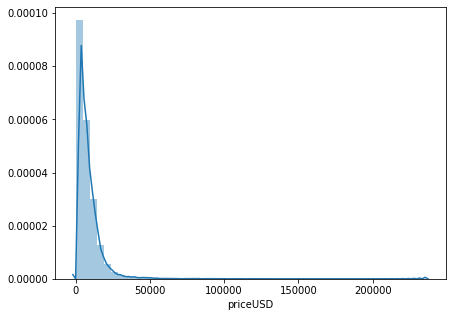

In [5]:
f,ax=plt.subplots(figsize=(7,5))
sns.distplot(data['priceUSD'])
plt.savefig('D:/data/1.jpg',bbox_inches='tight')



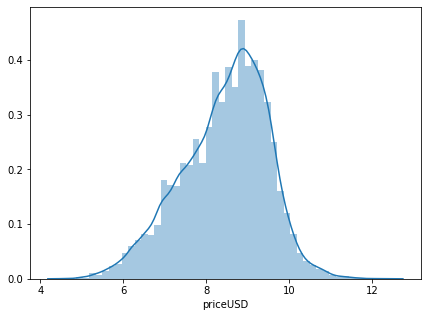

<Figure size 432x288 with 0 Axes>

In [6]:
f,ax=plt.subplots(figsize=(7,5))
ln_price=np.log(data['priceUSD'])
sns.distplot(ln_price)
plt.show()
plt.savefig('D:/data/2.jpg',bbox_inches='tight')

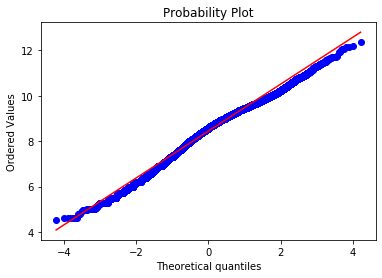

In [7]:
from scipy import stats
res=stats.probplot(ln_price,plot=plt)
plt.savefig('D:/data/3.jpg',bbox_inches='tight')


## Figure out the correlation between the variables

### numerical variables VS ln_price

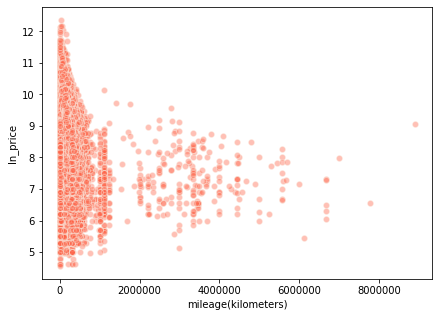

-0.22453935803094227


In [8]:
f,ax=plt.subplots(figsize=(7,5))
plt.scatter(x=data[ 'mileage(kilometers)'],y=ln_price,color='tomato',edgecolor='linen',alpha=0.4)
plt.xlabel('mileage(kilometers)')
plt.ylabel('ln_price')
plt.savefig('D:/data/4.jpg',bbox_inches='tight')
plt.show()
t=data['mileage(kilometers)'].corr(ln_price)
print(t)

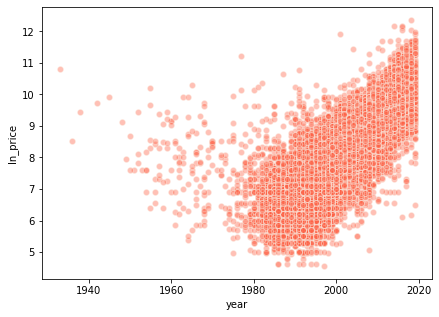

In [9]:
f,ax=plt.subplots(figsize=(7,5))
plt.scatter(data['year'],ln_price,color='tomato',edgecolor='linen',alpha=0.4)
plt.xlabel('year')
plt.ylabel('ln_price')
plt.savefig('D:/data/5.jpg')
plt.show()

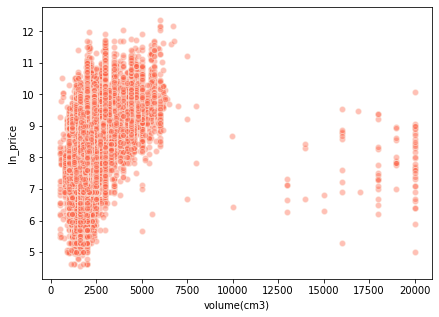

corr: 0.2509138749448893


In [10]:
f,ax=plt.subplots(figsize=(7,5))
plt.scatter(data['volume(cm3)'],ln_price,color='tomato',edgecolor='linen',alpha=0.4)
plt.xlabel('volume(cm3)')
plt.ylabel('ln_price')
plt.savefig('D:/data/6.png',bbox_inches='tight')
plt.show()
m=data['volume(cm3)'].corr(ln_price)
print(f'corr: {m}')

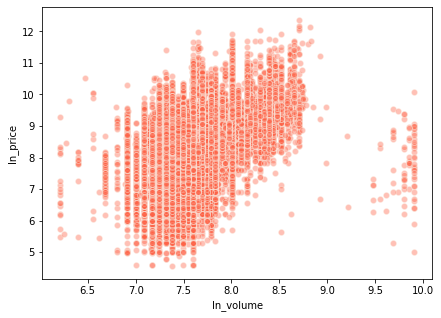

corr: 0.3299665516362861


In [11]:
f,ax=plt.subplots(figsize=(7,5))
ln_volu=np.log(data['volume(cm3)'])
plt.scatter(ln_volu,ln_price,color='tomato',edgecolor='linen',alpha=0.4)
plt.xlabel('ln_volume')
plt.ylabel('ln_price')
plt.savefig('D:/data/7.png',bbox_inches='tight')
plt.show()
mm=ln_volu.corr(ln_price)
print(f'corr: {mm}')

### categorical variables VS ln_price

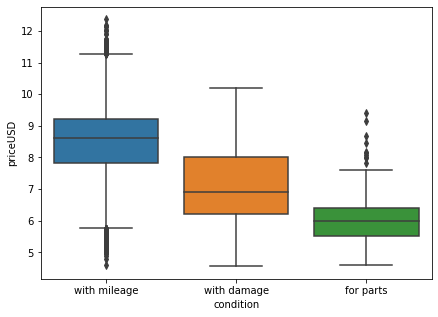

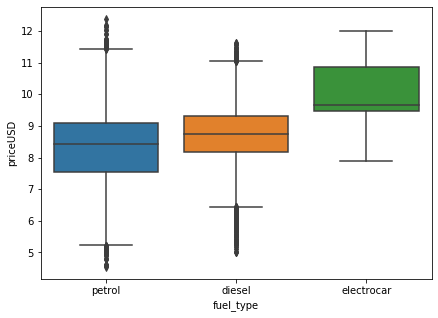

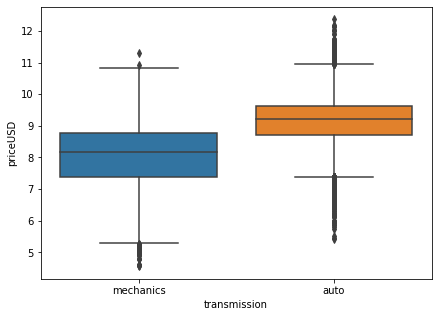

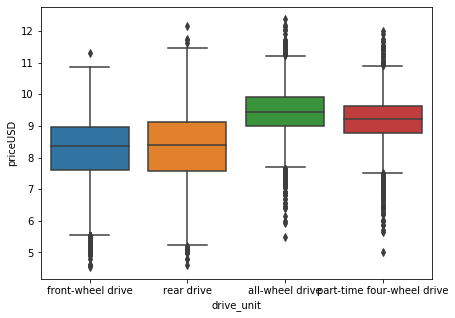

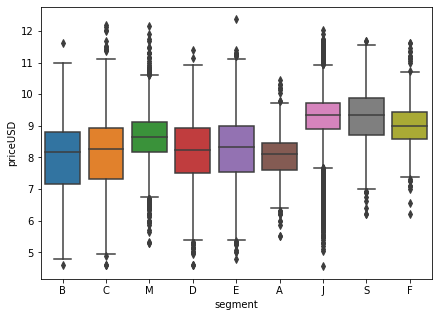

In [12]:
data1=data[['condition','fuel_type','transmission','drive_unit','segment']]
for i in data1:
    f,ax=plt.subplots(figsize=(7,5))
    sns.boxplot(x=data1[i],y=ln_price)
    plt.savefig(f'D:/data/{i}.png',bbox_inches='tight')
    plt.show()

## calculate the correlation coefficients

In [13]:
data['ln_volu']=ln_volu
da= data.drop(['make','model','color','priceUSD','volume(cm3)'],axis=1)
da=pd.get_dummies(da)
da

,year,mileage(kilometers),ln_volu,condition_for parts,condition_with damage,condition_with mileage,fuel_type_diesel,fuel_type_electrocar,fuel_type_petrol,transmission_auto,...,drive_unit_rear drive,segment_A,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,2008,162000.00,7.313220,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2009,120000.00,7.170120,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2009,61000.00,7.313220,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
3,2003,265000.00,7.244228,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2008,97183.00,7.244228,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,2005,150000.00,7.170120,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6,2008,112000.00,7.170120,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7,2009,95000.00,7.313220,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
8,2010,93804.00,7.313220,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9,2008,196511.00,7.313220,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [14]:
da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55940 entries, 0 to 55940
Data columns (total 24 columns):
year                                     55940 non-null int64
mileage(kilometers)                      55940 non-null float64
ln_volu                                  55940 non-null float64
condition_for parts                      55940 non-null uint8
condition_with damage                    55940 non-null uint8
condition_with mileage                   55940 non-null uint8
fuel_type_diesel                         55940 non-null uint8
fuel_type_electrocar                     55940 non-null uint8
fuel_type_petrol                         55940 non-null uint8
transmission_auto                        55940 non-null uint8
transmission_mechanics                   55940 non-null uint8
drive_unit_all-wheel drive               55940 non-null uint8
drive_unit_front-wheel drive             55940 non-null uint8
drive_unit_part-time four-wheel drive    55940 non-null uint8
drive_unit_rear dri

In [15]:
da1= da.drop(['condition_for parts','fuel_type_diesel','transmission_auto','drive_unit_all-wheel drive','segment_A'],axis=1)
da1

,year,mileage(kilometers),ln_volu,condition_with damage,condition_with mileage,fuel_type_electrocar,fuel_type_petrol,transmission_mechanics,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,2008,162000.00,7.313220,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0
1,2009,120000.00,7.170120,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0
2,2009,61000.00,7.313220,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
3,2003,265000.00,7.244228,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0
4,2008,97183.00,7.244228,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0
5,2005,150000.00,7.170120,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0
6,2008,112000.00,7.170120,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0
7,2009,95000.00,7.313220,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
8,2010,93804.00,7.313220,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0
9,2008,196511.00,7.313220,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0


In [16]:
da1['ln_price']=ln_price
correlation=da1.corr()
print(correlation['ln_price'].sort_values(ascending=False),'\n')

ln_price                                 1.000000
year                                     0.809234
segment_J                                0.365338
ln_volu                                  0.329967
condition_with mileage                   0.226228
drive_unit_part-time four-wheel drive    0.181403
segment_S                                0.104632
segment_F                                0.075211
segment_M                                0.072850
fuel_type_electrocar                     0.045875
drive_unit_rear drive                   -0.054580
segment_E                               -0.070217
condition_with damage                   -0.118907
segment_D                               -0.133916
segment_B                               -0.141464
segment_C                               -0.166015
fuel_type_petrol                        -0.179178
mileage(kilometers)                     -0.224539
drive_unit_front-wheel drive            -0.288781
transmission_mechanics                  -0.513643


## calculate the correlation coefficients (after delete the 'segment')

In [17]:
data2= data.drop(['make','model','color','priceUSD','volume(cm3)','segment'],axis=1)
data2=pd.get_dummies(data2)
data2


,year,mileage(kilometers),ln_volu,condition_for parts,condition_with damage,condition_with mileage,fuel_type_diesel,fuel_type_electrocar,fuel_type_petrol,transmission_auto,transmission_mechanics,drive_unit_all-wheel drive,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive
0,2008,162000.00,7.313220,0,0,1,0,0,1,0,1,0,1,0,0
1,2009,120000.00,7.170120,0,0,1,0,0,1,0,1,0,1,0,0
2,2009,61000.00,7.313220,0,0,1,0,0,1,1,0,0,1,0,0
3,2003,265000.00,7.244228,0,0,1,1,0,0,0,1,0,1,0,0
4,2008,97183.00,7.244228,0,0,1,1,0,0,0,1,0,1,0,0
5,2005,150000.00,7.170120,0,0,1,0,0,1,0,1,0,1,0,0
6,2008,112000.00,7.170120,0,0,1,0,0,1,0,1,0,1,0,0
7,2009,95000.00,7.313220,0,0,1,0,0,1,1,0,0,1,0,0
8,2010,93804.00,7.313220,0,0,1,0,0,1,0,1,0,1,0,0
9,2008,196511.00,7.313220,0,0,1,0,0,1,1,0,0,1,0,0


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55940 entries, 0 to 55940
Data columns (total 15 columns):
year                                     55940 non-null int64
mileage(kilometers)                      55940 non-null float64
ln_volu                                  55940 non-null float64
condition_for parts                      55940 non-null uint8
condition_with damage                    55940 non-null uint8
condition_with mileage                   55940 non-null uint8
fuel_type_diesel                         55940 non-null uint8
fuel_type_electrocar                     55940 non-null uint8
fuel_type_petrol                         55940 non-null uint8
transmission_auto                        55940 non-null uint8
transmission_mechanics                   55940 non-null uint8
drive_unit_all-wheel drive               55940 non-null uint8
drive_unit_front-wheel drive             55940 non-null uint8
drive_unit_part-time four-wheel drive    55940 non-null uint8
drive_unit_rear dri

In [19]:
data3= data2.drop(['condition_for parts','fuel_type_diesel','transmission_auto','drive_unit_all-wheel drive'],axis=1)
data3

,year,mileage(kilometers),ln_volu,condition_with damage,condition_with mileage,fuel_type_electrocar,fuel_type_petrol,transmission_mechanics,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive
0,2008,162000.00,7.313220,0,1,0,1,1,1,0,0
1,2009,120000.00,7.170120,0,1,0,1,1,1,0,0
2,2009,61000.00,7.313220,0,1,0,1,0,1,0,0
3,2003,265000.00,7.244228,0,1,0,0,1,1,0,0
4,2008,97183.00,7.244228,0,1,0,0,1,1,0,0
5,2005,150000.00,7.170120,0,1,0,1,1,1,0,0
6,2008,112000.00,7.170120,0,1,0,1,1,1,0,0
7,2009,95000.00,7.313220,0,1,0,1,0,1,0,0
8,2010,93804.00,7.313220,0,1,0,1,1,1,0,0
9,2008,196511.00,7.313220,0,1,0,1,0,1,0,0


In [20]:
data3['ln_price']=ln_price
correlation=data3.corr()
print(correlation['ln_price'].sort_values(ascending=False),'\n')

ln_price                                 1.000000
year                                     0.809234
ln_volu                                  0.329967
condition_with mileage                   0.226228
drive_unit_part-time four-wheel drive    0.181403
fuel_type_electrocar                     0.045875
drive_unit_rear drive                   -0.054580
condition_with damage                   -0.118907
fuel_type_petrol                        -0.179178
mileage(kilometers)                     -0.224539
drive_unit_front-wheel drive            -0.288781
transmission_mechanics                  -0.513643
Name: ln_price, dtype: float64 



## heat map

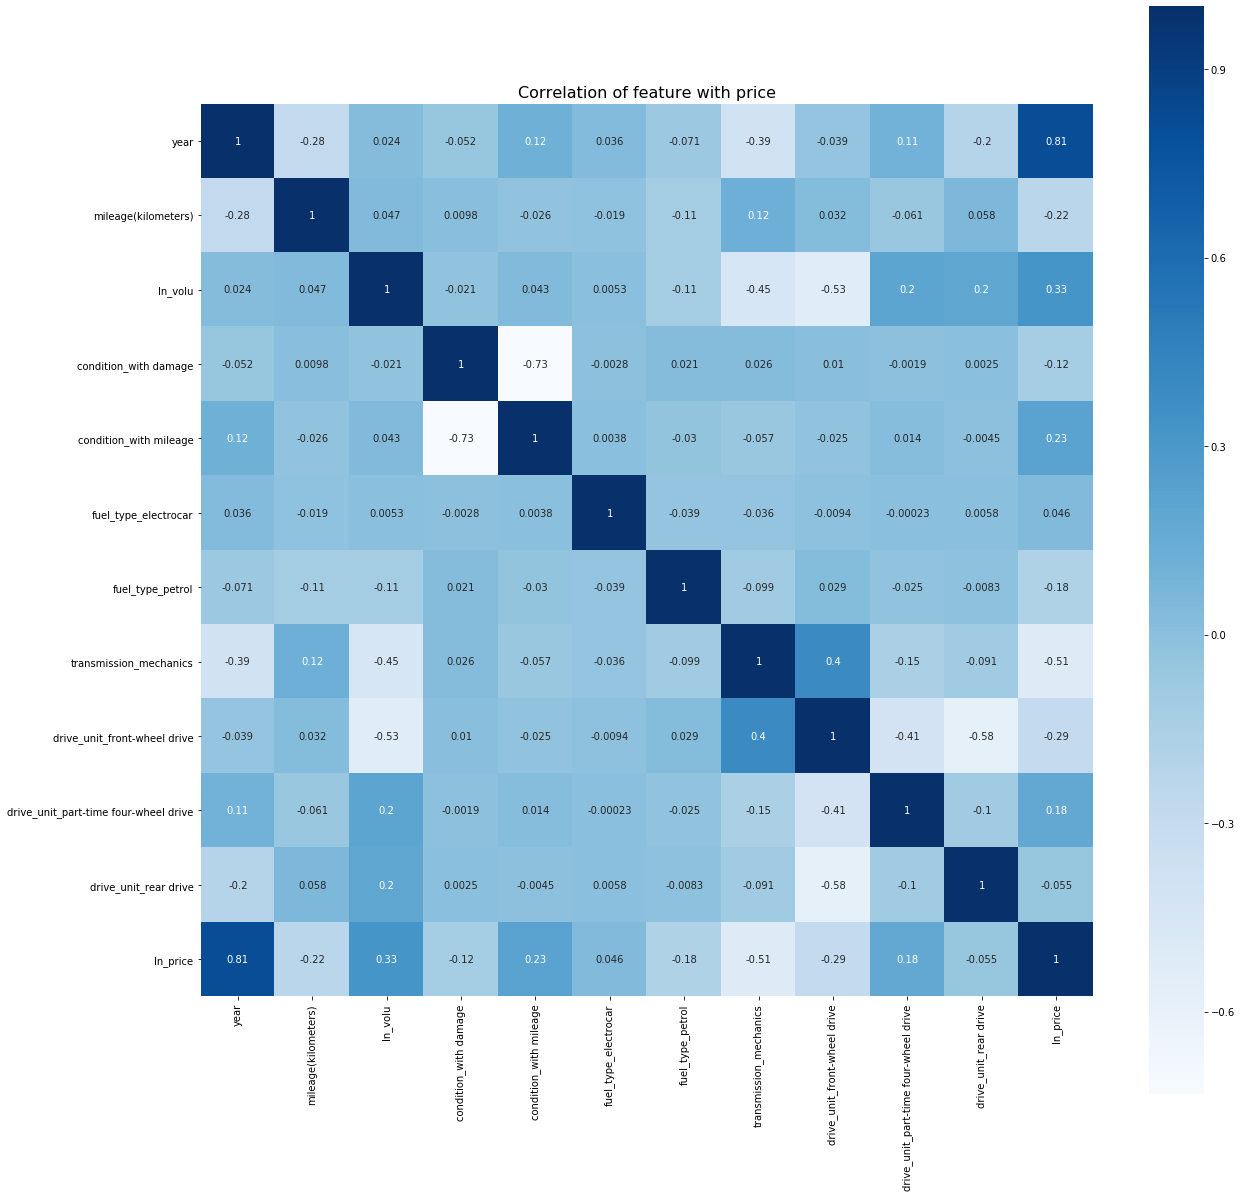

In [21]:
f,ax=plt.subplots(figsize=(20,20))
plt.title('Correlation of feature with price',y=1,size=16)
sns.heatmap(correlation,annot=True,vmax=1,square=True,cmap='Blues')
plt.savefig(f'D:/data/8.png',bbox_inches='tight')
plt.show()

## do regression analysis

In [22]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55940 entries, 0 to 55940
Data columns (total 12 columns):
year                                     55940 non-null int64
mileage(kilometers)                      55940 non-null float64
ln_volu                                  55940 non-null float64
condition_with damage                    55940 non-null uint8
condition_with mileage                   55940 non-null uint8
fuel_type_electrocar                     55940 non-null uint8
fuel_type_petrol                         55940 non-null uint8
transmission_mechanics                   55940 non-null uint8
drive_unit_front-wheel drive             55940 non-null uint8
drive_unit_part-time four-wheel drive    55940 non-null uint8
drive_unit_rear drive                    55940 non-null uint8
ln_price                                 55940 non-null float64
dtypes: float64(3), int64(1), uint8(8)
memory usage: 5.1 MB


### split the data

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris
X=data3.drop('ln_price',axis=1)
y=data3['ln_price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

### code package1:

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.coef_

array([ 9.34924988e-02, -9.44007486e-08,  6.28797324e-01,  4.08448280e-01,
        1.17437957e+00,  3.90694387e-01, -2.38970456e-01, -2.00453259e-01,
       -3.27799652e-01, -7.04864132e-02, -1.13712844e-01])

In [26]:
model.intercept_

-184.24795600510382

In [27]:
R2=model.score(X_train,y_train)
print(f'R square: {R2}')

R square: 0.7960874826066854


### calculate MAE, MSE and RMSE

In [28]:
y_pred=model.predict(X_test)
y_pred

array([9.21554004, 8.1808799 , 9.11519385, ..., 8.83226884, 8.82195192,
       9.86232057])

In [29]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print(f'MAE:{MAE}')
print(f'MSE:{MSE}')
print(f'RMSE:{RMSE}')


MAE:0.3277503638956219
MSE:0.2412974489215854
RMSE:0.4912203669653625


### code package2:

In [30]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 1.687e+04
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:52:39   Log-Likelihood:                -31495.
No. Observations:               47549   AIC:                         6.301e+04
Df Residuals:                   47537   BIC:                         6.312e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  -184.2480      0.655   -281.229      0.000    -185.532    -182.964
year                                      0.0935      0.000    293.455      0.000       0.093       0.094
mileage(kilometers)                    -9.44e-08   8.88e-09    -10.635      0.000   -1.12e-07    -7.7e-08
ln_volu                                   0.6288      0.009     69.718      0.000       0.611       0.646
condition_with damage                     0.4084      0.033     12.310      0.000       0.343       0.473
condition_with mileage                    1.1744      0.024     48.007      0.000       1.126       1.222
fuel_type_electrocar                      0.3907      0.075      5.186      0.000       0.243       0.538
fuel_type_petrol                         -0.2390      0.005    -50.860      0.000      -0.248      -0.230
transmission_mechanics                   -0.2005      0.006    -34.388      0.000      -0.212      -0.189
drive_unit_front-wheel drive             -0.3278      0.008    -39.196      0.000      -0.344      -0.311
drive_unit_part-time four-wheel drive    -0.0705      0.011     -6.566      0.000      -0.092      -0.049
drive_unit_rear drive                    -0.1137      0.009    -12.038      0.000      -0.132      -0.095
==============================================================================
Omnibus:                    15462.911   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           618565.205
Skew:                           0.868   Prob(JB):                         0.00
Kurtosis:                      20.584   Cond. No.                     1.07e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### use graph to observe the predicted values and actual values

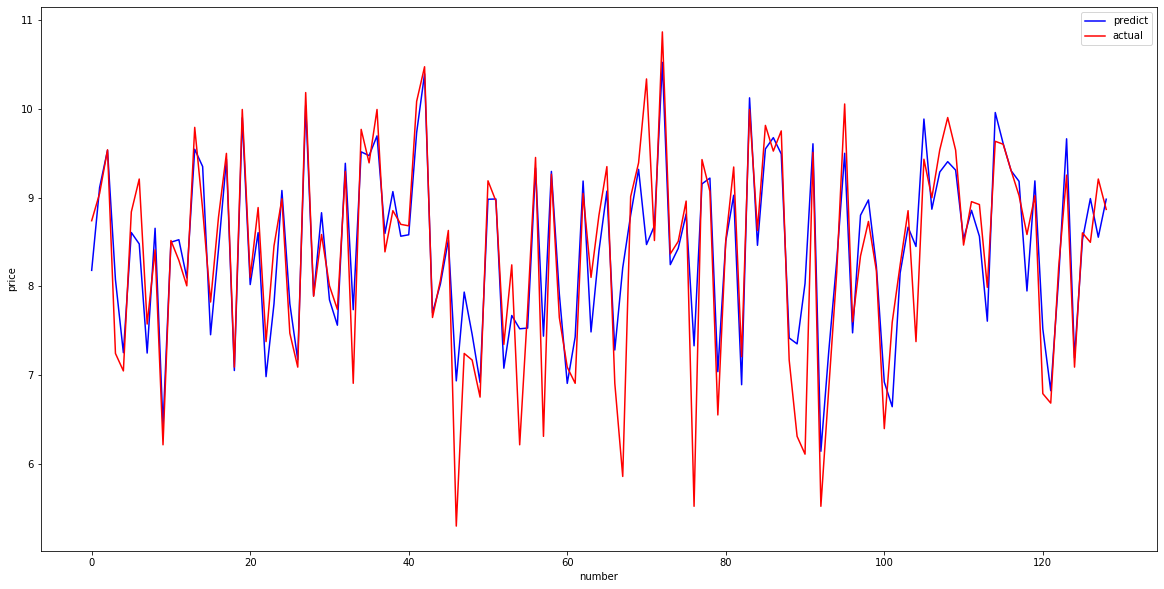

In [31]:
f,ax=plt.subplots(figsize=(20,10))
plt.plot(range(len(y_pred[1:130])),y_pred[1:130],'b',label='predict')
plt.plot(range(len(y_pred[1:130])),y_test[1:130],'r',label='actual')
plt.legend(loc='upper right')
plt.xlabel('number')
plt.ylabel('price')
plt.savefig('D:/data/9.png')
plt.show()